### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [119]:
data = pd.read_csv('data/coupons.csv')

In [120]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [182]:
data = pd.read_csv('data/coupons.csv')


has_nan = data.isnull().values.any()
if has_nan:
    total_rows = len(data)
    # Calculate percentage of NaN values per column
    nan_percentage = (data.isnull().sum() / total_rows) * 100

    # Filter only columns that have NaN values
    nan_columns = nan_percentage[nan_percentage > 0]
    print('Percentage of NaN values per column if any NaN exists:')
    print(nan_columns.map(lambda x: str(x)+'%'))    


Percentage of NaN values per column if any NaN exists:
car                      99.14853358561967%
Bar                     0.8435824660990224%
CoffeeHouse             1.7108167770419427%
CarryAway               1.1904761904761905%
RestaurantLessThan20    1.0249132765689057%
Restaurant20To50         1.490066225165563%
dtype: object


Percentage of rows without any NaN values:  0.85%. 
Removing all rows with th NaN values will result in loss of 99.15% of data. 
Car column has 99.15% NaN values. This column may not be useful for our analysis. This column will be dropped.
We will keep the rows with NaN values and replace NaN values with the '' of the column. 


In [193]:

new_data= data.drop(columns=['car'])

for col in nan_columns.index:
    if col != 'car':
        print(col)
        new_data[col] = new_data[col].fillna('')

has_nan = data.isnull().values.any()
print('NaN values exist: ',has_nan)

Bar
CoffeeHouse
CarryAway
RestaurantLessThan20
Restaurant20To50
NaN values exist:  True


4. What proportion of the total observations chose to accept the coupon?



In [195]:
data_coupons_accepted = data[data['Y']==1]
print('Percetage accepted coupon',len(data_coupons_accepted)/len(data)*100,'%')


Percetage accepted coupon 56.84326710816777 %


5. Use a bar plot to visualize the `coupon` column.

<Axes: xlabel='coupon'>

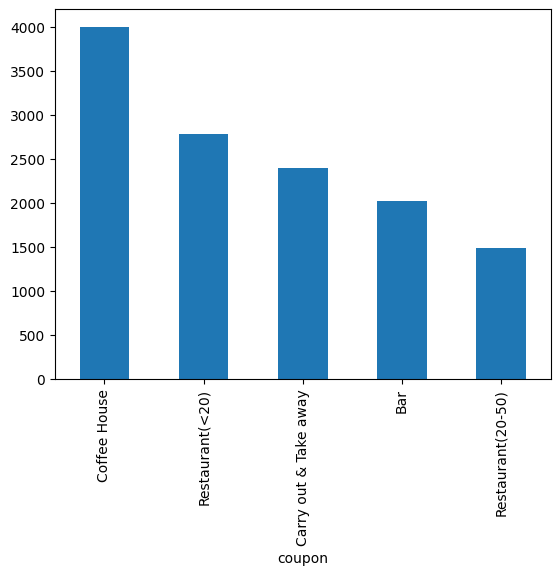

In [125]:
data['coupon'].value_counts().plot(kind='bar')

6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature'>

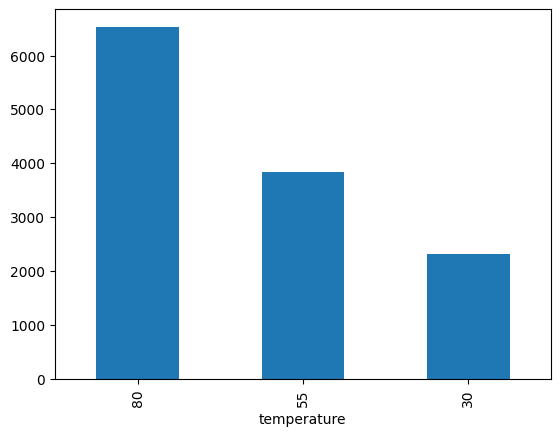

In [126]:
data['temperature'].value_counts().plot(kind='bar')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [ ]:
data_bar_coupons= data[data['coupon']=='Bar']



2017


2. What proportion of bar coupons were accepted?


In [200]:
print('Percentage of bar coupons accepted',len(data_bar_coupons[data['Y']==1])/len(data_bar_coupons)*100,'%')

Percentage of bar coupons accepted 41.00148735746158 %


C:\Users\mingl\AppData\Local\Temp\ipykernel_5168\478169993.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('Percentage of bar coupons accepted',len(data_bar_coupons[data['Y']==1])/len(data_bar_coupons)*100,'%')


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [220]:
data_bar_goers_less_often=data[(data['Y']==1) &  (data['Bar'].isin(['never', 'less1', '1~3']))]
print('acceptance rate between those who went to a bar 3 or fewer times a month',len(data_bar_goers_less_often)/len(data)*100,'%')
data_bar_goers_more_often=data[(data['Y']==1) &  (data['Bar'].isin(['gt8', '4~8']))]
print('acceptance rate between those who went to a bar 4 or more times a month',len(data_bar_goers_more_often)/len(data )*100,'%')

print('Summary: Those who goes bar less than 3 times a month are more likely to accept the coupon')


acceptance rate between those who went to a bar 3 or fewer times a month 49.416587827183854 %
acceptance rate between those who went to a bar 4 or more times a month 6.993062125512457 %
Summary: Those who goes bar less than 3 times a month are more likely to accept the coupon


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [224]:
data_bar_coupons_under_25=data[(data['Bar'].isin([ '1~3','gt8', '4~8'] )) &(~data['age'].isin(['below21','21']))]
acceptance_rate_under_25 = len(data_bar_coupons_under_25[data_bar_coupons_under_25['Y']==1])/len(data )*100
acceptance_rate_all_others = len(data[data['Y']==1])/len(data )*100 - acceptance_rate_under_25
print('Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25',acceptance_rate_under_25,'%')
print('Acceptance rate for other drivers',acceptance_rate_all_others,'%')
print('Summary: Those who goes bar less than 1 times a month or yonger than 25are more likely to accept the coupon')

Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 13.60769473352255 %
Acceptance rate for other drivers 43.23557237464522 %
Summary: Those who goes bar less than 1 times a month or yonger than 25are more likely to accept the coupon


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [ ]:
data_bar_more_often = data[data['Bar'].isin([ '1~3','gt8', '4~8'])]
data_with_kid_passengers = data[(data['passanger']!='Kid(s)') & ( ~data['occupation'].isin(['Unemployed','Farming Fishing & Forestry']))]
acceptance_rate_bar_more = len(data_bar_more_often[data_bar_more_often['Y']==1])/len(data)*100
acceptance_rate_with_kid_passengers = len(data_with_kid_passengers[data_with_kid_passengers['Y']==1])/len(data)*100
print('Acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry',acceptance_rate_bar_more_than_once_a_month,'%')
print('Acceptance rate between for all others except drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry',acceptance_rate_bar_all_others,'%')

Acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry 8.169209431345353 %
Acceptance rate between for all others except drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry 78.15264447664656 %


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [149]:
data_acceped = data[data['Y']==1]
data_not_kid_widowed = data[(data['Y']==0)&(data['age']!='below21') &(data['maritalStatus']!='Widowed')]
data_bar_often_under_30 = data[(data['Y']==0)& (data['age'].isin(['below21','21','26'])) &(data['Bar'].isin(['1~3', 'gt8', '4~8']))]
data_bar_cheap_restaurant_under_50k = data[(data['Y']==0)& (data['RestaurantLessThan20'].isin(['4~8',  'gt8'])) &(data['income'].isin(['$37500 - $49999']))]
print('acceptance rates for going to bars more than once a month, had passengers that were not a kid, and were not widowed',len(data_not_kid_widowed)/len(data_acceped*100),'%')
print('acceptance rates for going to bars more than once a month and are under the age of 30',len(data_bar_often_under_30)/len(data_acceped*100),'%')
print('acceptance rates for going to cheap restaurants more than 4 times a month and income is less than 50K',len(data_bar_cheap_restaurant_under_50k)/len(data_acceped*100),'%')




acceptance rates for going to bars more than once a month, had passengers that were not a kid, and were not widowed 0.7220527045769765 %
acceptance rates for going to bars more than once a month and are under the age of 30 0.11719833564493759 %
acceptance rates for going to cheap restaurants more than 4 times a month and income is less than 50K 0.03384188626907073 %


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [150]:
print('Those drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed are most likely to accept the coupon')


Those drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed are most likely to accept the coupon


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Mapping for column 'coupon': {0: 'Bar', 1: 'Carry out & Take away', 2: 'Coffee House', 3: 'Restaurant(20-50)', 4: 'Restaurant(<20)'}
Mapping for column 'Y': {0: 0, 1: 1}
Mapping for column 'age': {0: '21', 1: '26', 2: '31', 3: '36', 4: '41', 5: '46', 6: '50plus', 7: 'below21'}
Mapping for column 'income': {0: '$100000 or More', 1: '$12500 - $24999', 2: '$25000 - $37499', 3: '$37500 - $49999', 4: '$50000 - $62499', 5: '$62500 - $74999', 6: '$75000 - $87499', 7: '$87500 - $99999', 8: 'Less than $12500'}
Mapping for column 'maritalStatus': {0: 'Divorced', 1: 'Married partner', 2: 'Single', 3: 'Unmarried partner', 4: 'Widowed'}
Mapping for column 'RestaurantLessThan20': {0: '1~3', 1: '4~8', 2: 'gt8', 3: 'less1', 4: 'never', 5: nan}
Mapping for column 'Restaurant20To50': {0: '1~3', 1: '4~8', 2: 'gt8', 3: 'less1', 4: 'never', 5: nan}
Mapping for column 'has_children': {0: 0, 1: 1}
Mapping for column 'education': {0: 'Associates degree', 1: 'Bachelors degree', 2: 'Graduate degree (Masters or 

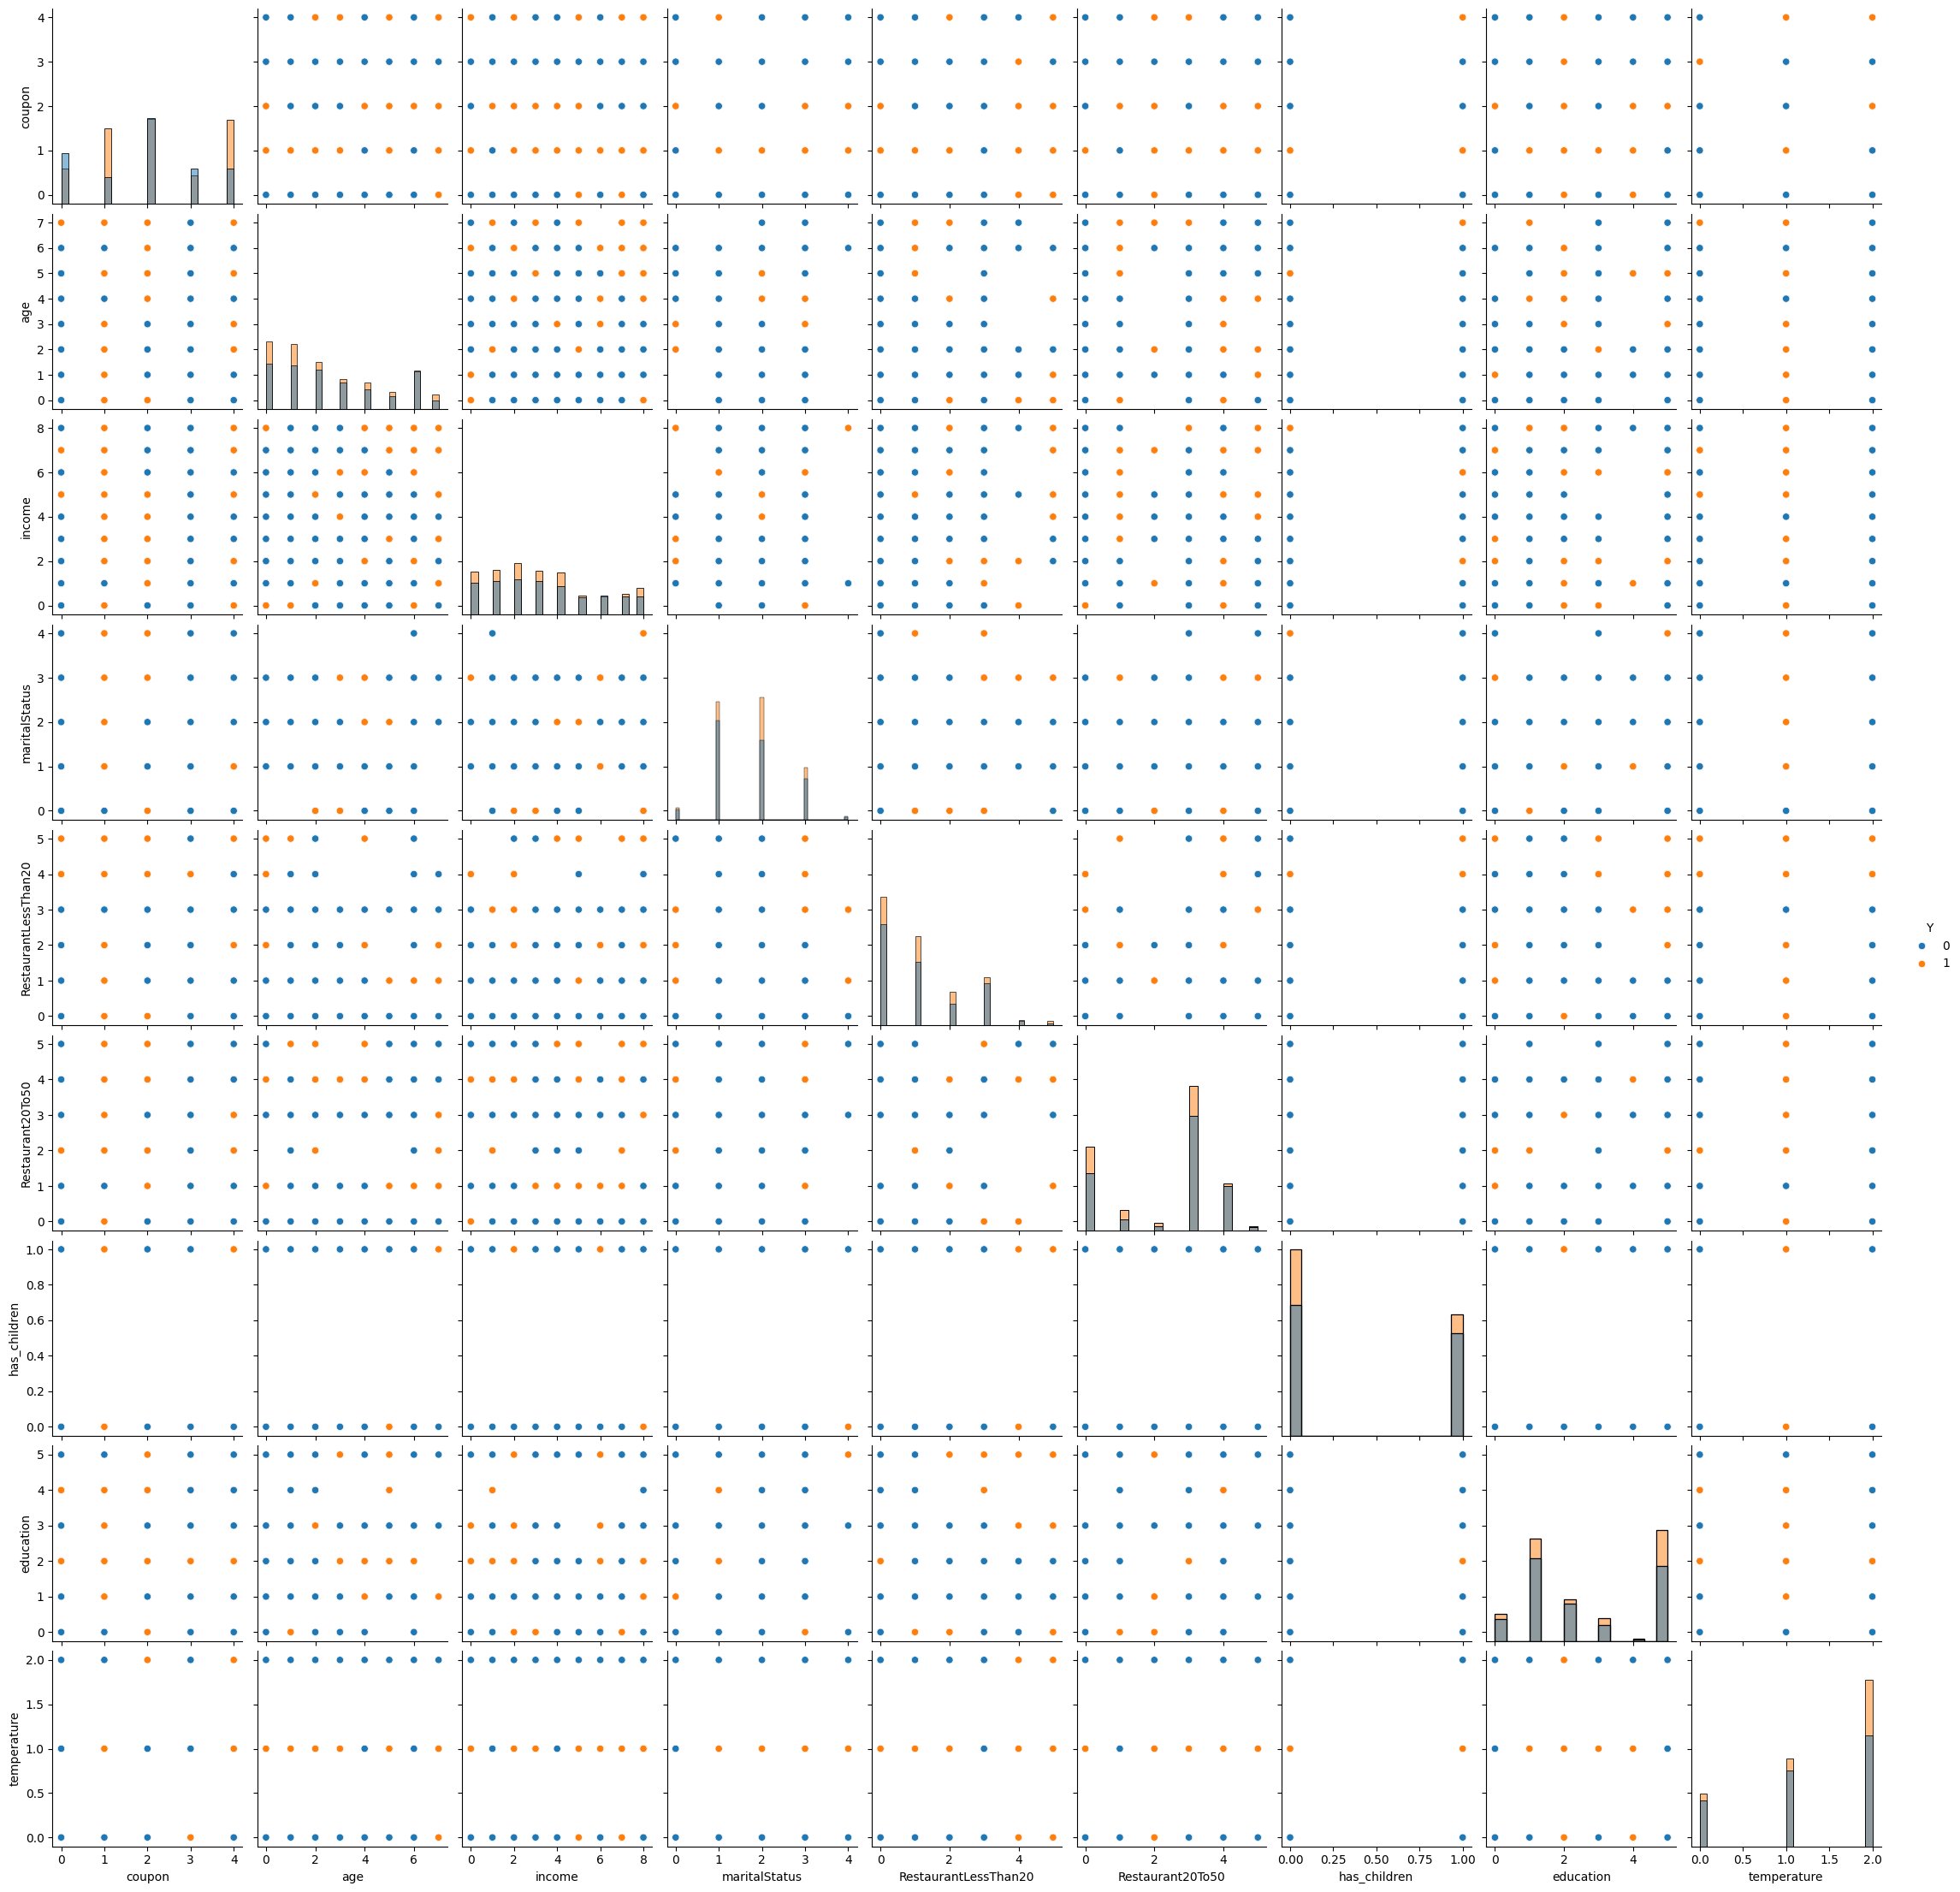

In [ ]:
from sklearn.preprocessing import LabelEncoder

def label_encode(new_data):
    label_encoders = {}
    label_mappings = {}
    for col in new_data.columns:
        le = LabelEncoder()
        #new_data[col] = le.fit_transform(new_data[col])
        new_data.loc[:,col] = le.fit_transform(new_data[col])
        label_encoders[col] = le  # Store encoders if you need to decode later
        label_mappings[col] = dict(enumerate(le.classes_))  #

    for col, mapping in label_mappings.items():
        print(f"Mapping for column '{col}': {mapping}")
    return new_data

data = pd.read_csv('data/coupons.csv')
new_data=data[['coupon','Y','age','income','maritalStatus','RestaurantLessThan20','Restaurant20To50','has_children','education','temperature','passanger']]
new_data = label_encode(new_data)

    

sns.pairplot(new_data, hue='Y',diag_kind='hist')




Pair plot shows that the following type of drivers are likely to accept the coupon:
1. Copons for 'Carry out & Take away' and 'Restaurant(20-50)' are most likely to be accepted
2. Drivers with age 21 or 46 
3. Drivers with income between '$62500 - $99999' 
4. Single drivers 
5. Drivers who have never gone to a cheap restaurant 1-8 times a month
6. Drivers who have never gone to a good restaurant 0-3 times a month 
7. Drivers who have no kid 
8. Drivers who has'Bachelors degree' or 'Some college - no degree' 



Mapping for column 'destination': {0: 'Home', 1: 'No Urgent Place', 2: 'Work'}
Mapping for column 'passanger': {0: 'Alone', 1: 'Friend(s)', 2: 'Kid(s)', 3: 'Partner'}
Mapping for column 'weather': {0: 'Rainy', 1: 'Snowy', 2: 'Sunny'}
Mapping for column 'temperature': {0: 30, 1: 55, 2: 80}
Mapping for column 'time': {0: '10AM', 1: '10PM', 2: '2PM', 3: '6PM', 4: '7AM'}
Mapping for column 'coupon': {0: 'Bar', 1: 'Carry out & Take away', 2: 'Coffee House', 3: 'Restaurant(20-50)', 4: 'Restaurant(<20)'}
Mapping for column 'expiration': {0: '1d', 1: '2h'}
Mapping for column 'gender': {0: 'Female', 1: 'Male'}
Mapping for column 'age': {0: '21', 1: '26', 2: '31', 3: '36', 4: '41', 5: '46', 6: '50plus', 7: 'below21'}
Mapping for column 'maritalStatus': {0: 'Divorced', 1: 'Married partner', 2: 'Single', 3: 'Unmarried partner', 4: 'Widowed'}
Mapping for column 'has_children': {0: 0, 1: 1}
Mapping for column 'education': {0: 'Associates degree', 1: 'Bachelors degree', 2: 'Graduate degree (Masters o

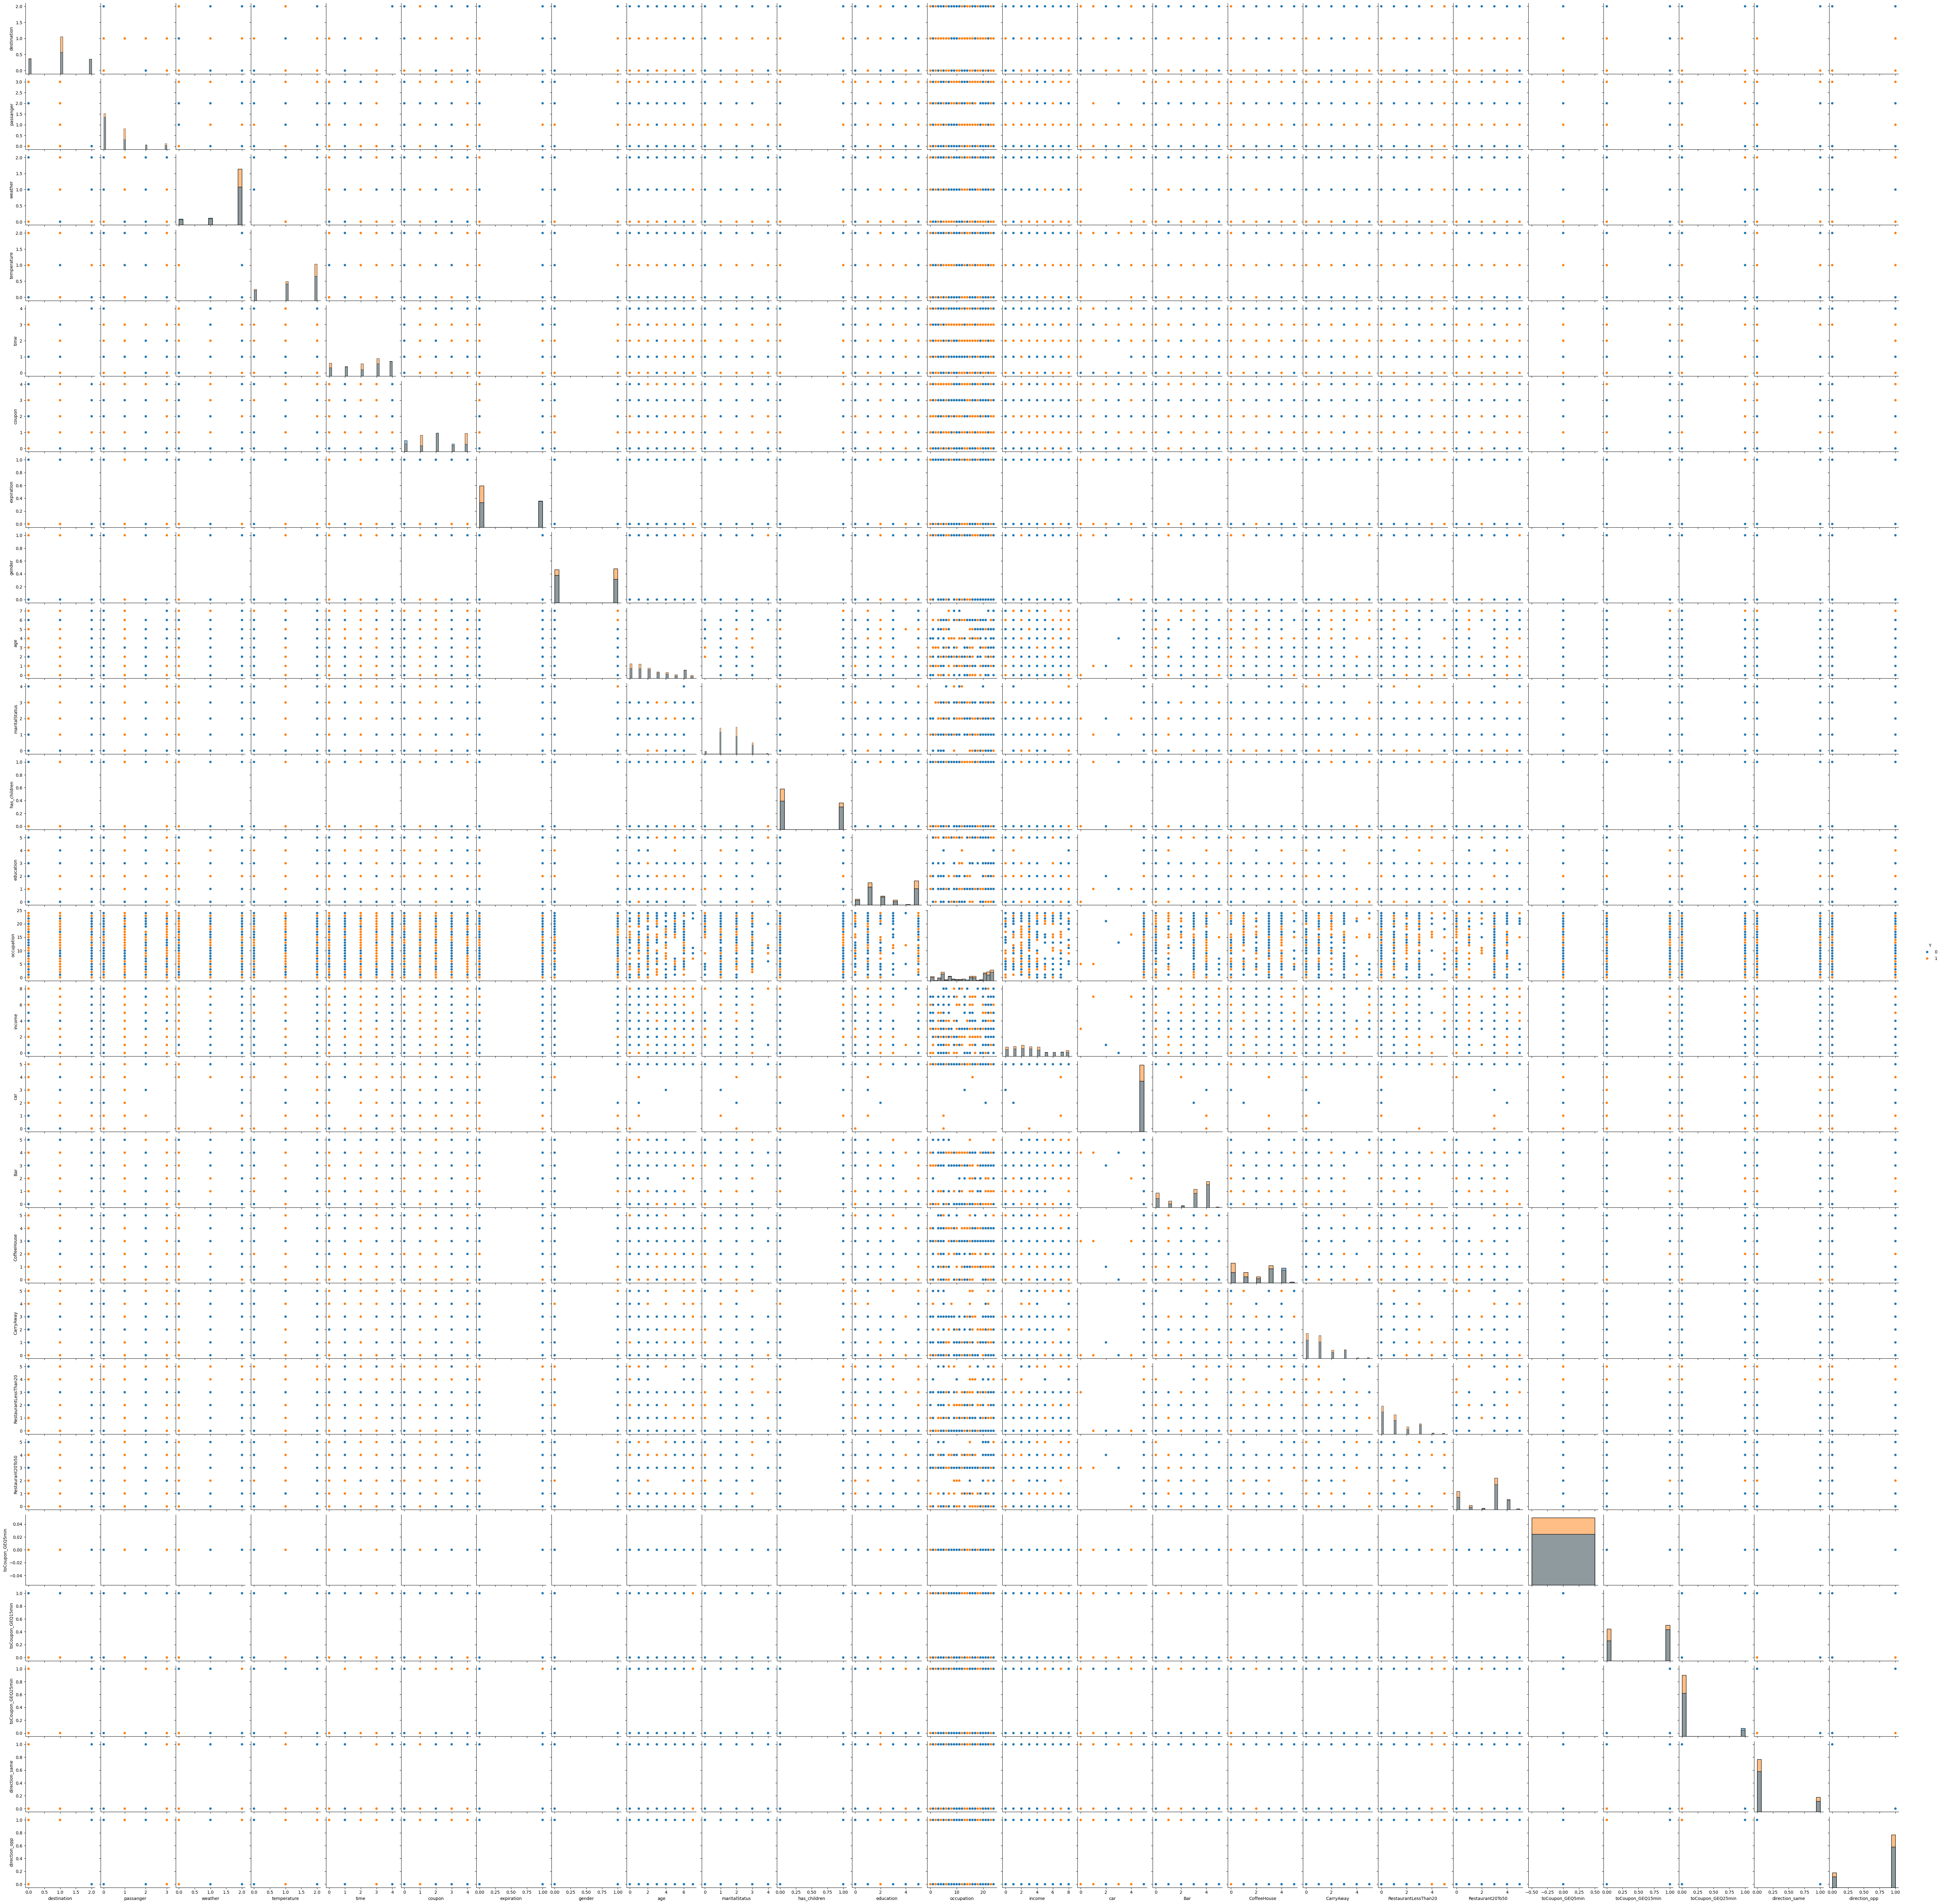

In [180]:
data = pd.read_csv('data/coupons.csv')
data = label_encode(data)

sns.pairplot(data, hue='Y',diag_kind='hist')